In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
apps_df = pd.read_csv("apps.csv")
apps_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
reviews_df = pd.read_csv("user_reviews.csv")
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
apps_df.drop(columns=["Unnamed: 0"], inplace=True)

In [13]:
apps_df["Installs"] = apps_df["Installs"].astype(str).str.replace("+", "", regex=False).str.replace(",", "", regex=False).astype(float)

apps_df["Price"] = apps_df["Price"].astype(str).str.replace("$", "", regex=False).astype(float)

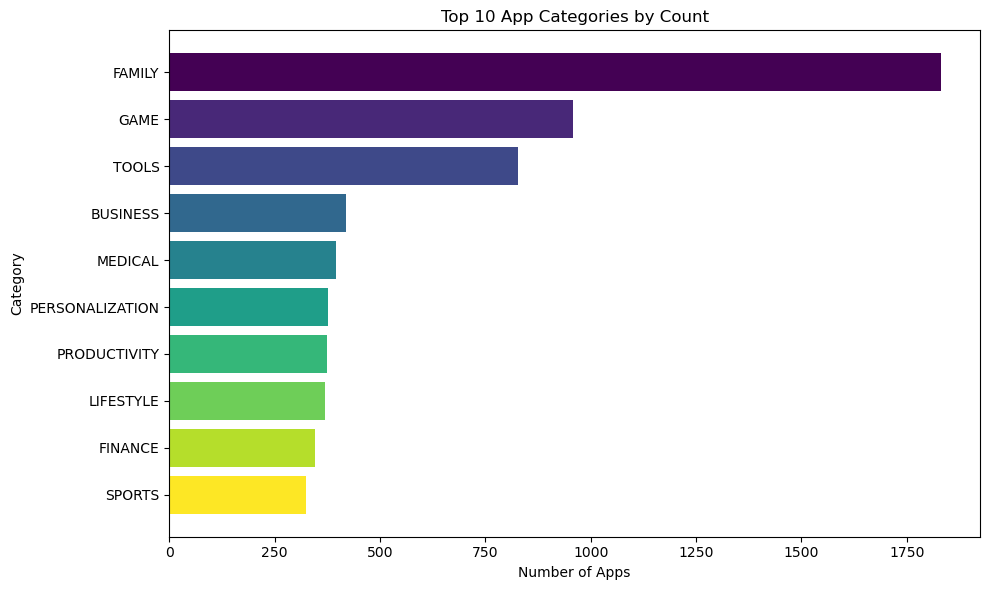

In [21]:
# Prepare data
category_counts = apps_df["Category"].value_counts().head(10)
category_df = category_counts.reset_index()
category_df.columns = ["Category", "Count"]

import matplotlib.pyplot as plt
import numpy as np

# Build a color list from a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(category_df)))

plt.figure(figsize=(10, 6))
plt.barh(
    y=category_df["Category"],
    width=category_df["Count"],
    color=colors
)
plt.title("Top 10 App Categories by Count")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.gca().invert_yaxis()  # largest on top (optional)
plt.tight_layout()
plt.show()

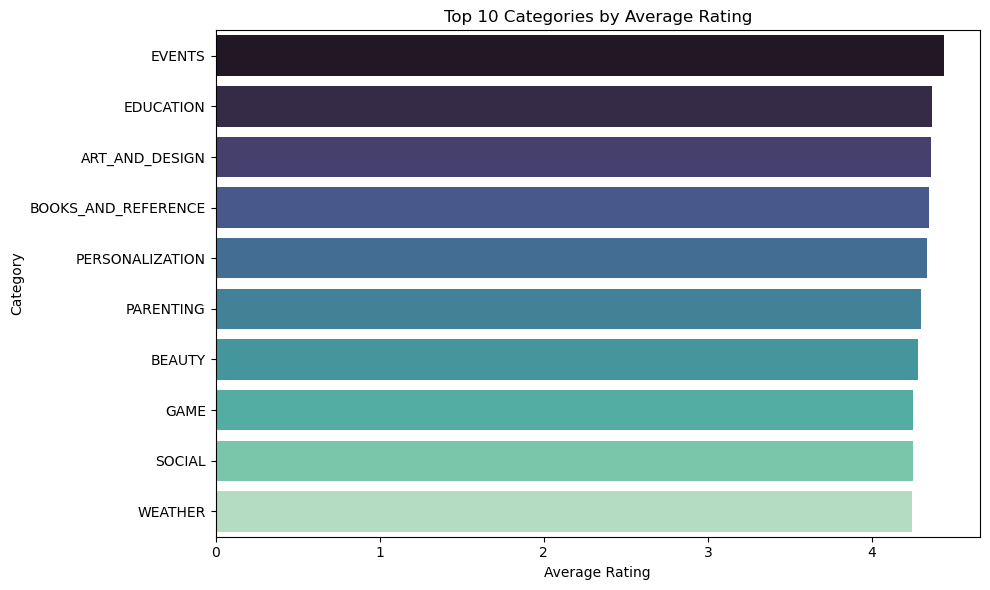

In [24]:
rating_by_category = apps_df.groupby("Category")["Rating"].mean().sort_values(ascending=False).head(10)

rating_df = rating_by_category.reset_index()
rating_df.columns = ["Category", "Average Rating"]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=rating_df,
    x="Average Rating",
    y="Category",
    hue="Category",
    palette="mako",
    dodge=False,  
    legend=False
)
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

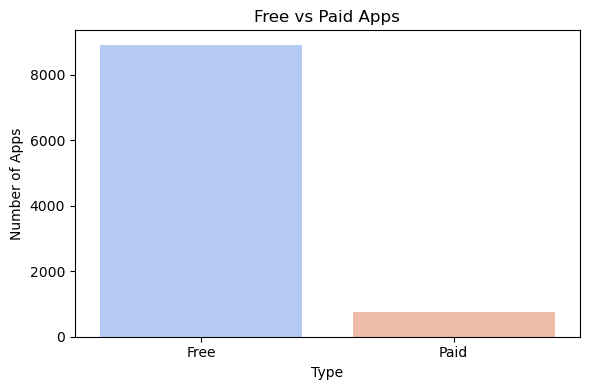

In [26]:
type_counts = apps_df["Type"].value_counts()
type_df = type_counts.reset_index()
type_df.columns = ["Type", "Count"]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(
    data=type_df,
    x="Type",
    y="Count",
    hue="Type",        
    palette="coolwarm", 
    dodge=False,        
    legend=False        
)
plt.title("Free vs Paid Apps")
plt.xlabel("Type")
plt.ylabel("Number of Apps")
plt.tight_layout()
plt.show()

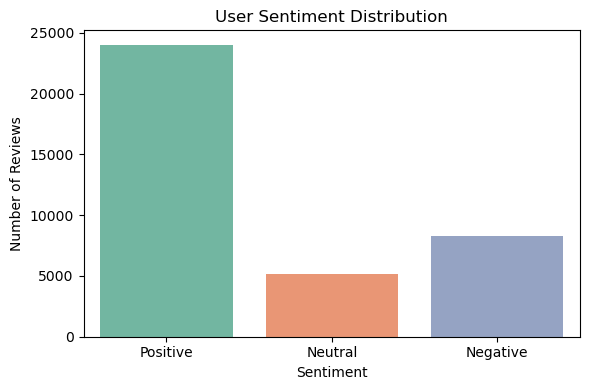

In [32]:
# Standardize sentiment labels
sentiment_map = {
    "Positive": "Positive",
    "Neutral": "Neutral",
    "Negative": "Negative"
}

# Create a proper copy and assign with .loc to avoid SettingWithCopyWarning
clean_reviews = reviews_df.dropna(subset=["Sentiment"]).copy()
clean_reviews.loc[:, "Sentiment"] = clean_reviews["Sentiment"].map(sentiment_map)

# Custom order
order = ["Positive", "Neutral", "Negative"]

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(
    data=clean_reviews,
    x="Sentiment",
    order=order,
    hue="Sentiment",
    palette="Set2",
    dodge=False,
    legend=False
)
plt.title("User Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

In [33]:
sentiment_map = {
    "Positive": "Positive",
    "Neutral": "Neutral",
    "Negative": "Negative",
    "Negative Sentiment": "Negative"
}

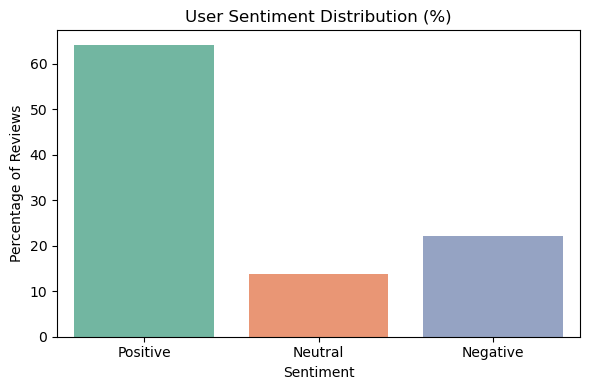

In [34]:
pct = (clean_reviews["Sentiment"].value_counts(normalize=True)
       .reindex(order).mul(100))
plt.figure(figsize=(6, 4))
sns.barplot(x=pct.index, y=pct.values, hue=pct.index, palette="Set2", dodge=False, legend=False)
plt.title("User Sentiment Distribution (%)")
plt.xlabel("Sentiment")
plt.ylabel("Percentage of Reviews")
plt.tight_layout()
plt.show()